<a href="https://colab.research.google.com/github/czhangg17/COVID-19/blob/master/Covid_19_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones del comportamiento del coronavirus en Colombia con redes LSTM

**Autor:** Cindy Zhang Gao

**Curso :** Mineria de datos

**profesor:** Alvaro Mauricio Montenegro



** Referencias **


1.   https://github.com/AprendizajeProfundo/Ciencia-de-Datos/blob/master/Cuadernos/Times_series_Multivariate.ipynb
2.   https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651

3. https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

4. Curso de Minería de Datos Universidad Nacional de Colombia. Profesor: Alvaro Montenegro. https://github.com/AprendizajeProfundo/Ciencia-de-Datos

# Introducción

A final de 2019 una gripe producida en la ciudad de Wuhan china a causa de la transmision de un Murciélago en las plazas de mercado es lo que ha causado la gran pandemia del 2020, frendo la economía, cambiando hábitos y mostrando nuevas facetas de la humnidad.

El interés por predecir, ha sido ua gran incógnita, preguntas cómo : ¿ Cuándo se llegará a pico?, ¿cuándo se acabará el virus? y si viviremos con el toda la vida son preguntas muy comunes.

En este cuaderno tratemos una metodología para la predicción de casos de coronavirus en Colombia a través de Redes neuronales de tipo LSMT.


# Objetivos


*   Modelar mediantes redes LSTM el comportamiento del coronavirus en Colombia
*   Reconocer metodogias para la prediccion de series temporales univariadas y multivariadas aplicado a los datos de coronavirus en Colombia




# Varaibles

A contunuación las variables utilizadas para el estudio de comportamiento del coronavirus



*   Casos Acumulados en Colombia
*   Casos diarios en Colombia
*   Número de muertes en colombia
*   Número de muertes nuevas en colombia
*   Número de recuperados en colombia
*   Número de recuperados nuevos en colombia
*   Número total de pruebas (tests)
*   Número de nuevas pruebas diarias



# Librerias 
A continuacion vamos a descargar las librerias a utilizar

In [ ]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pylab as plt
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False



# Importacion de los datos
Los datos en son obtenidos del INS y Oxford Martin School.La página para acceso de los [datos](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data )
sin tratamiento. 





In [ ]:
from google.colab import drive
PATH = '/content/drive/My Drive/Mineria de datos/datosCovid.csv' 
drive.mount('/content/drive')
covid=pd.read_csv(PATH, header=0)
#print(covid)  
#covid=pd.read_excel(datosCovid.xlsx.csv)
covid.tail()

#https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
97841,97882,2020-06-25T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,41,M,En estudio,Leve,NaN,2020-06-23T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,11,NaN,NaN,NaN
97842,97883,2020-06-25T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,20,F,En estudio,Leve,NaN,2020-06-24T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,11,NaN,NaN,NaN
97843,97884,2020-06-25T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,34,M,En estudio,Leve,NaN,2020-06-24T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,11,NaN,NaN,NaN
97844,97885,2020-06-16T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,67,M,En estudio,Asintomático,NaN,Asintomático,NaN,2020-06-30T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,11,NaN,NaN,NaN
97845,97886,2020-06-23T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,36,M,En estudio,Leve,NaN,2020-06-21T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,2020-06-30T00:00:00.000,NaN,11,NaN,NaN,NaN


In [ ]:
covid_multi=pd.read_excel('/content/drive/My Drive/Mineria de datos/COV.xlsx')

# Tratamiento  de los datos
Se agrupan los datos por fecha y se seleccionan las columnas de interés. Se obtiene la siguiente tabla .


In [ ]:
covid_multi=pd.read_excel('/content/drive/My Drive/Mineria de datos/COV.xlsx')
covid_multi.tail()

,fecha,total_casos,total_muertes,total_recuperados,total_tests,total_activos,new_cases,new_deaths,new_tests
115,2020-06-28,88591,2931,36000,725828.0,49660,4149,128,18140.0
116,2020-06-29,91769,3106,38280,743437.0,50383,3178,167,17609.0
117,2020-06-30,95043,3223,39954,760719.0,51866,3274,117,17282.0
118,2020-07-01,97846,3334,42073,NaN,52439,2803,111,NaN
119,2020-07-02,102009,3470,43407,NaN,55132,4163,136,NaN


In [ ]:
#medidas descriptivas para datos en crudo
df=covid
df.describe()

,ID de caso,Código DIVIPOLA,Edad,Codigo departamento,Codigo pais
count,97846.000000,97846.000000,97846.000000,97846.000000,872.000000
mean,48961.709993,25123.840361,39.246367,24.981829,611.016055
std,28248.813971,25715.895192,18.501078,25.717322,248.150592
min,1.000000,5001.000000,0.000000,5.000000,32.000000
25%,24502.250000,8758.000000,26.000000,8.000000,484.000000
50%,48963.500000,11001.000000,36.000000,11.000000,724.000000
75%,73424.750000,27001.000000,52.000000,27.000000,840.000000
max,97886.000000,99001.000000,122.000000,99.000000,862.000000


In [ ]:

df_diarios=pd.crosstab(df['Fecha de notificación'], columns='count')
df_acumulados=np.cumsum(df_diarios)

In [ ]:
df_diarios.index=pd.to_datetime(df_diarios.index)
df_acumulados.index=pd.to_datetime(df_acumulados.index)
df_diarios.tail()

col_0,count
Fecha de notificación,
2020-06-26,1376
2020-06-27,669
2020-06-28,177
2020-06-29,163
2020-06-30,6


Text(0.5, 1.0, 'Grafica Casos diarios en Colombia')

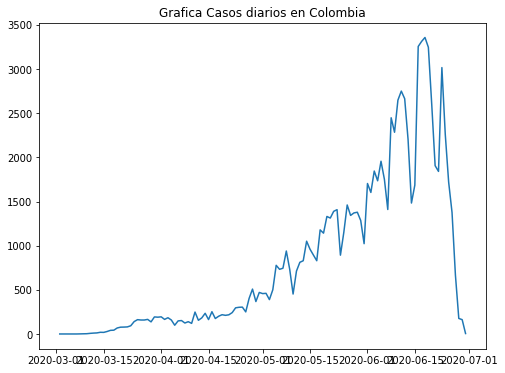

In [ ]:
plt.plot(df_diarios)
plt.title('Grafica Casos diarios en Colombia')


Text(0.5, 1.0, 'Casos Acumulados en Colombia')

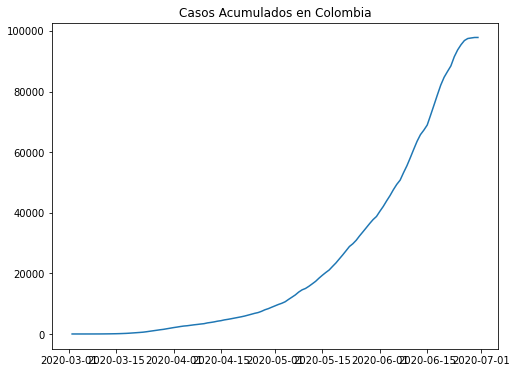

In [ ]:
plt.plot(df_acumulados)
plt.title('Casos Acumulados en Colombia')

# Red LSTM con casos diarios



In [ ]:
np.random.seed(7)

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [ ]:
# esta funcion nos permite poner en una matriz los datos que se encuentrar en un vector
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)
# semilla aleatoria para reproducibilidad
np.random.seed(7)

## Reescalamiento de los datos


In [ ]:
#normalizacion de los datos
diarios=df_diarios.values
dataset_scaled = scaler.fit_transform(diarios)
dataset=pd.DataFrame(dataset_scaled)
dataset.index=df_diarios.index

#diarios=scaler.fit_transform(diarios)


In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(df)]
len_train = len(train)
len_test = len(test)
print(len_train, len_test)


94 24


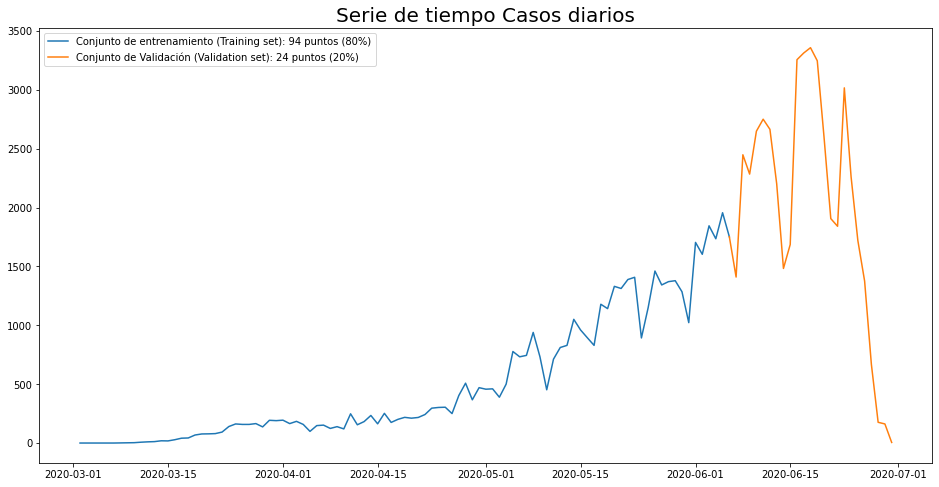

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_diarios[:len_train], label='Conjunto de entrenamiento (Training set): ' + str(len_train) +' puntos (80%)')
plt.plot(df_diarios['count'][len_train-1:], label='Conjunto de Validación (Validation set): '  + str(len_test) + ' puntos (20%)') 
plt.title("Serie de tiempo Casos diarios", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)


In [ ]:
print(X_train.shape, trainY.shape)

(93, 1, 1) (93, 1)


In [ ]:
lstm_output =60
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60)                14880     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 61        
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train, trainY,
    epochs=30,
    batch_size=32,
    validation_split=0.01,
    verbose=0,
    shuffle=False
)

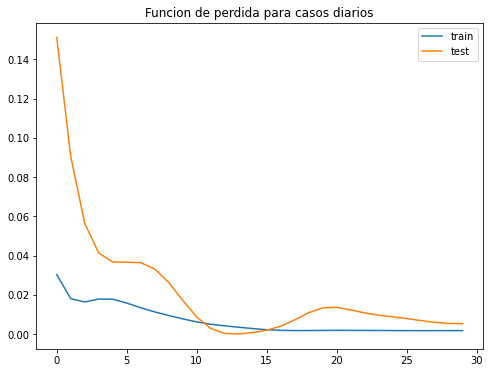

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Funcion de perdida para casos diarios')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)
x_pred=model.predict(X_train)

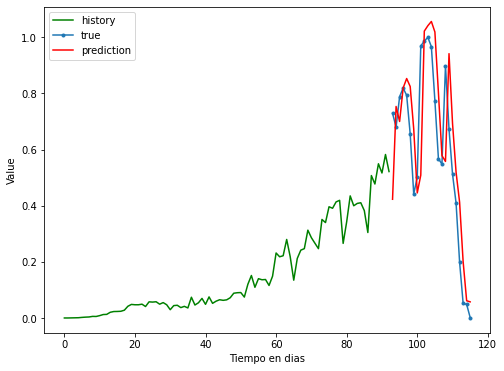

In [ ]:
plt.plot(np.arange(0, len(trainY)), trainY, 'g', label="history")
plt.plot(np.arange(len(trainY), len(trainY) + len(testY)), testY, marker='.', label="true")
plt.plot(np.arange(len(trainY), len(trainY) + len(testY)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Tiempo en dias')
plt.legend()
plt.show();

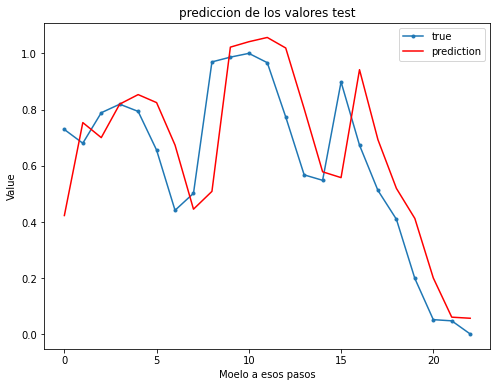

In [ ]:
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Moelo a esos pasos')
plt.legend()
plt.title('prediccion de los valores test')
plt.show();

#transformcion a la escala original

In [ ]:
scaled_data = scaler.fit_transform(df_diarios.values)
dataset = pd.DataFrame(scaled_data)
dataset.columns = ['count']
dataset.index = df_diarios.index

In [ ]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(testY.reshape(-1,1))
y_pred.shape

(23, 1)

In [ ]:
x_pred=scaler.inverse_transform(x_pred)
x_test=scaler.inverse_transform(X_train.reshape(-1,1))
x_pred.shape

(93, 1)

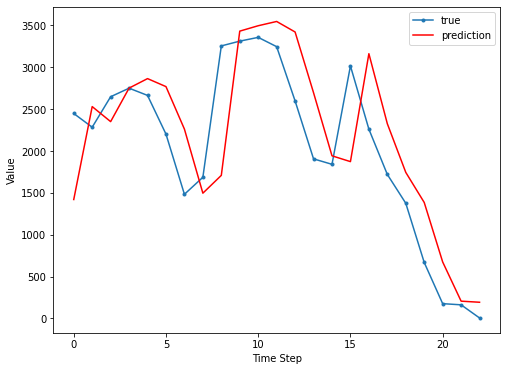

In [ ]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
# calculemos el error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(x_test,x_pred))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, y_pred))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del entrenamiento: 27.10 RMSE
Resultado del test: 2389.56 RMSE


In [ ]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps 
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
### casos diarios
series = covid_multi[:118]
#series.tail()
raw_seq=series.new_cases.values
type(raw_seq)
n_steps=3
X, y = split_sequences(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
  #define model
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
 #fit model
history=model.fit(X, y, epochs=200, verbose=0)

x_input = array(raw_seq[115:118])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)



[[3697.4238]]


In [ ]:
print('Para la fecha siguiente se pronostica que habran  %.2f nuevos infectados en colombia' % int(yhat))

Para la fecha siguiente se pronostica que habran  3697.00 nuevos infectados en colombia


# Serie  con casos acumulados


Text(0.5, 1.0, 'Casos acumulados en Colombia')

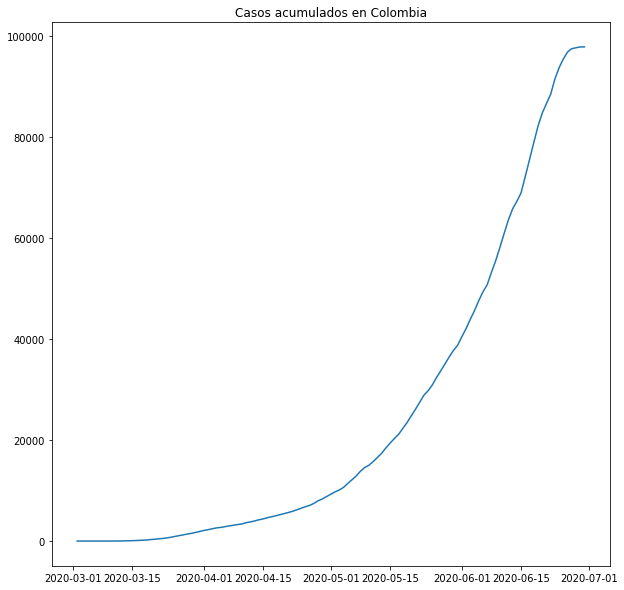

In [ ]:
df=covid
df_diarios=pd.crosstab(df['Fecha de notificación'], columns='count')
df_acumulados=np.cumsum(df_diarios)
df_diarios.index=pd.to_datetime(df_diarios.index)
df_acumulados.index=pd.to_datetime(df_acumulados.index)
#df_acumulados.tail()

plt.figure(figsize=(10,10))
plt.plot(df_acumulados)
plt.title('Casos acumulados en Colombia')


In [ ]:

#normalizacion de los datos
dataset_scaled = scaler.fit_transform(df_acumulados.values)
dataset=pd.DataFrame(dataset_scaled)
dataset.index=df_acumulados.index

#dividimo entre datos de entrenamiento y de validacion
train_size=int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train=dataset[:train_size]
test=dataset[train_size:len(dataset)]
print(train_size,test_size)




94 24


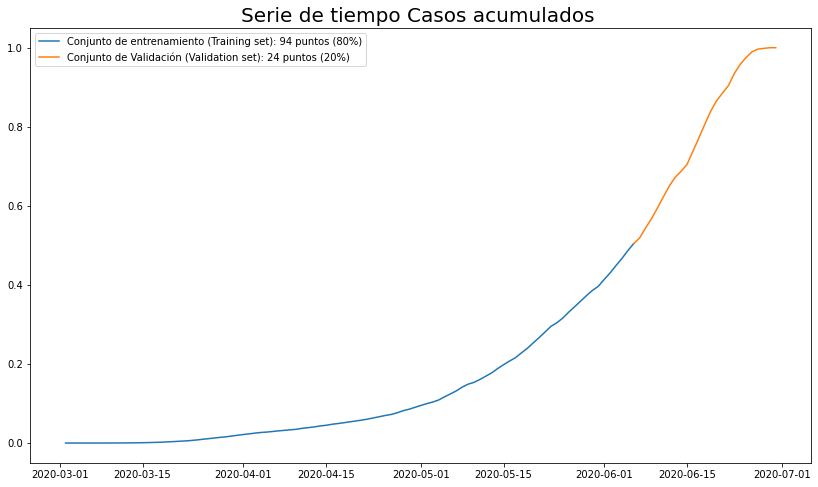

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(train_size) +' puntos (80%)')
plt.plot(dataset[train_size-1:len(df_acumulados)], label='Conjunto de Validación (Validation set): '  + str(test_size) + ' puntos (20%)') 
plt.title("Serie de tiempo Casos acumulados ", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)

# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_output =60# como se escoge esta cantidad de outputs
model = keras.Sequential()
model.add(keras.layers.LSTM(units=32,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

#compilacion del modelo
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

#history=model.fit(trainX,trainY,epochs=100, batch_size=1,verbose=2)
history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=16,
    validation_split=0.01,
    verbose=0,
    shuffle=False
)


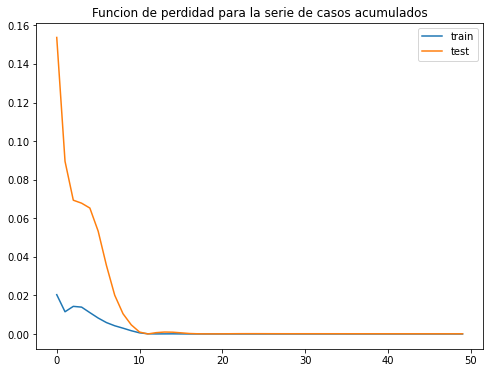

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Funcion de perdidad para la serie de casos acumulados')
plt.legend();

In [ ]:
#predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculo del error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Resultado del test: %.2f RMSE' % (testScore))

#predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps ] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset)-1, :] = testPredict

Resultado del entrenamiento: 299.04 RMSE
Resultado del test: 5049.98 RMSE


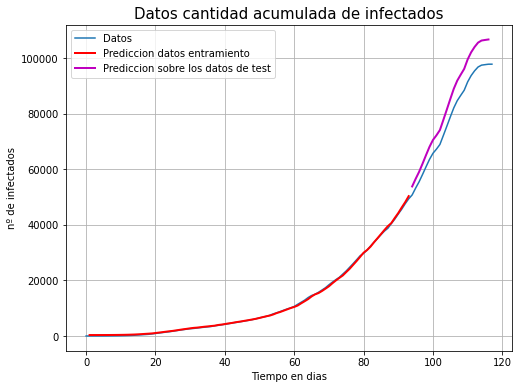

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos cantidad acumulada de infectados", fontsize = 15)
plt.xlabel("Tiempo en dias", fontsize = 10)
plt.ylabel("nº de infectados", fontsize = 10)
plt.show()


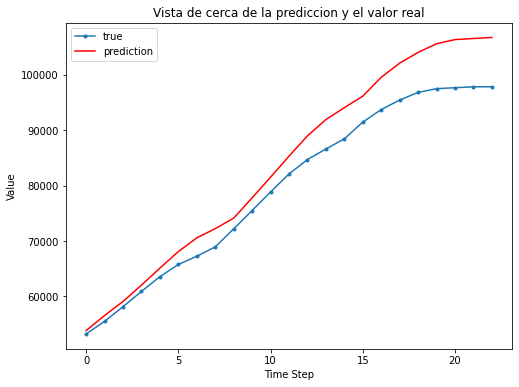

In [ ]:
plt.plot(testY, marker='.', label="true")
plt.plot(testPredict, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('Vista de cerca de la prediccion y el valor real')
plt.legend()
plt.show();

In [ ]:
### casos acumulados
series = covid_multi[:118]
#series.tail()
raw_seq=series.total_casos.values
type(raw_seq)
n_steps=3
X, y = split_sequences(raw_seq, n_steps)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
  #define model
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
 #fit model
history=model.fit(X, y, epochs=200, verbose=0)

x_input = array(raw_seq[115:118])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

print('Para la fecha siguiente se pronostica que habran  %.2f nuevos infectados en colombia' % int(yhat))

Para la fecha siguiente se pronostica que habran  99273.00 nuevos infectados en colombia


# Serie numero de muertos acumulados


<Figure size 864x576 with 0 Axes>

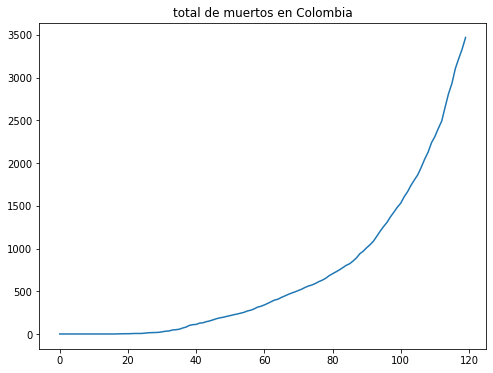

<Figure size 864x576 with 0 Axes>

In [ ]:
df_muertos=covid_multi['total_muertes']
plt.plot(df_muertos)
plt.title('total de muertos en Colombia')
plt.figure(figsize=(12,8))

In [ ]:
df_muertos_values=np.reshape(df_muertos.values, (-1,1))

In [ ]:
#normalizacion de los datos
dataset_scaled=scaler.fit_transform(df_muertos_values)
dataset=pd.DataFrame(dataset_scaled)
dataset.index.index=df_muertos.index

#division entre datos de validacion y datos de entrenamiento

train_size=int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train=dataset[:train_size]
test=dataset[train_size:len(dataset)]
print(train_size,test_size)



96 24


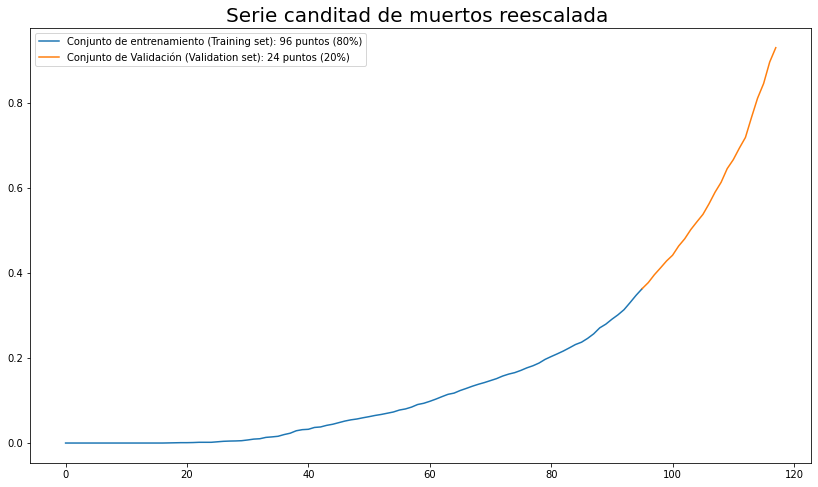

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(train_size) +' puntos (80%)')
plt.plot(dataset[train_size-1:len(df_acumulados)], label='Conjunto de Validación (Validation set): '  + str(test_size) + ' puntos (20%)') 
plt.title("Serie canditad de muertos reescalada ", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)

print(X_train.shape, trainY.shape)

# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_output =60 # como se escoge esta cantidad de outputs
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

#compilacion del modelo
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

(95, 1, 1) (95, 1)


In [ ]:
history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=16,
    validation_split=0.01,
    verbose=0,
    shuffle=False
)

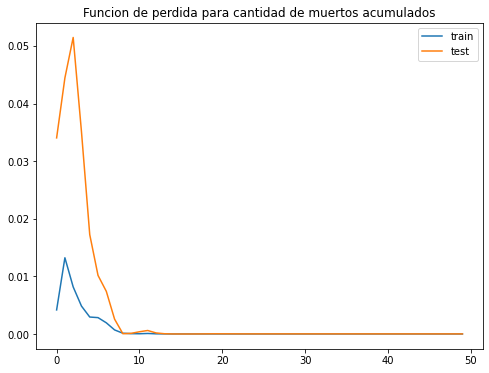

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Funcion de perdida para cantidad de muertos acumulados')
plt.legend();

In [ ]:
#predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculo del error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Resultado del test: %.2f RMSE' % (testScore))


Resultado del entrenamiento: 6.13 RMSE
Resultado del test: 129.86 RMSE


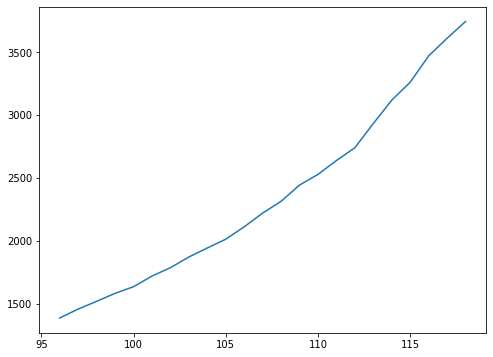

In [ ]:
#predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps ] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset)-1, :] = testPredict

plt.plot(testPredictPlot)


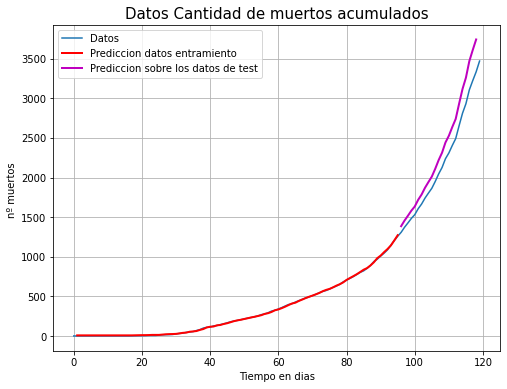

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos Cantidad de muertos acumulados", fontsize = 15)
plt.xlabel("Tiempo en dias", fontsize = 10)
plt.ylabel("nº muertos ", fontsize = 10)
plt.show()


# Serie numero de recuperados

Text(0.5, 1.0, 'Serie de numero de recuperados acumulados')

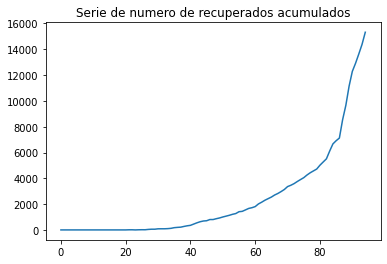

In [ ]:
df_recuperados=covid_multi['total_recuperados'][:95]
plt.plot(df_recuperados)
plt.title('Serie de numero de recuperados acumulados')

In [ ]:
#normalizacion de los datos
df_recuperados_value=np.reshape(df_recuperados.values,(-1,1))
dataset_scaled = scaler.fit_transform(df_recuperados_value)
dataset=pd.DataFrame(dataset_scaled)
dataset.index=df_recuperados.index

In [ ]:
#dividimo entre datos de entrenamiento y de validacion
train_size=int(len(dataset)*0.8)
test_size= len(dataset)-train_size
train=dataset[:train_size]
test=dataset[train_size:len(dataset)]
print(train_size,test_size)



76 19


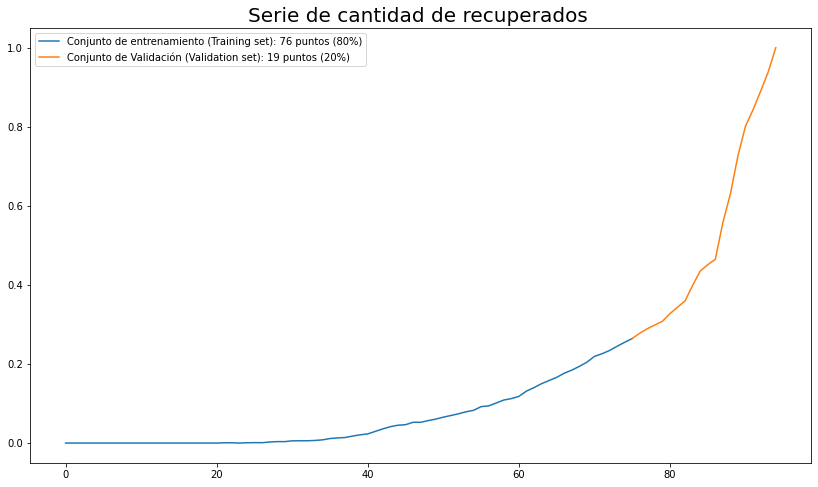

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(train_size) +' puntos (80%)')
plt.plot(dataset[train_size-1:len(df_acumulados)], label='Conjunto de Validación (Validation set): '  + str(test_size) + ' puntos (20%)') 
plt.title("Serie de cantidad de recuperados ", size = 20)
plt.legend()
plt.show()

In [ ]:
#preparando los datos
time_steps = 1

# reshape to [samples, time_steps, n_features]

X_train, trainY = create_dataset(train, train.values, time_steps)
X_test, testY = create_dataset(test, test.values, time_steps)

print(X_train.shape, trainY.shape)

# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm_output =60# como se escoge esta cantidad de outputs
model = keras.Sequential()
model.add(keras.layers.LSTM(units=lstm_output,  input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))

#compilacion del modelo
model.compile(loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)


(75, 1, 1) (75, 1)


In [ ]:
history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=16,
    validation_split=0.01,
    verbose=1,
    shuffle=False
)

Epoch 1/50
5/5 [==============================] - 0s 77ms/step - loss: 0.0027 - val_loss: 0.0189
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0218
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0264
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0215
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0128
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0075
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0056
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 4.3544e-04 - val_loss: 0.0013
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 1.5052e-04 - val_loss: 5.3287e-05
Epoch 11/50
5/5 [=========

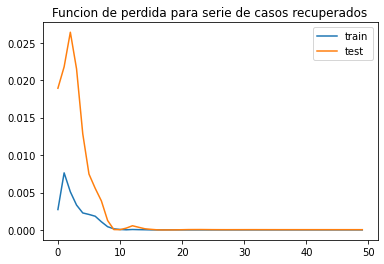

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Funcion de perdida para serie de casos recuperados')
plt.legend();

In [ ]:
#predicciones
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

#calculo del error rms
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Resultado del test: %.2f RMSE' % (testScore))

#predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps ] = trainPredict

# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+1:len(dataset)-1, :] = testPredict

Resultado del entrenamiento: 37.84 RMSE
Resultado del test: 554.10 RMSE


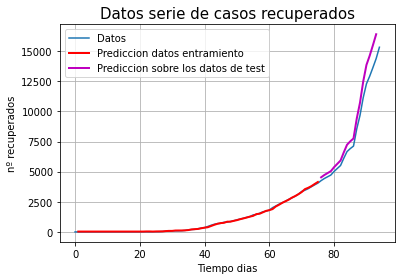

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos serie de casos recuperados", fontsize = 15)
plt.xlabel("Tiempo dias", fontsize = 10)
plt.ylabel("nº recuperados", fontsize = 10)
plt.show()


In [ ]:
# make a persistence forecast
def persistence(last_ob, n_seq):
	return [last_ob for i in range(n_seq)]
 
# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))
 
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	plt.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		plt.plot(xaxis, yaxis, color='red')
	# show the plot
	plt.show()
 

# Red LSTM  Multivariada



In [ ]:
# Importamcion de datos para la parte multivariada
from google.colab import drive
drive.mount('/content/drive')
covid_multi=pd.read_excel('/content/drive/My Drive/Mineria de datos/COV.xlsx')
covid_multi.tail()
#llenar los na con 16000 y 16.500 los datos 95 y 96 en total recuperados


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fecha,total_casos,total_muertes,total_recuperados,total_tests
114,2020-06-27,84442,2811,34937,707688.0
115,2020-06-28,88591,2931,36000,725828.0
116,2020-06-29,91769,3106,38280,743437.0
117,2020-06-30,95043,3223,39954,760719.0
118,2020-07-01,97846,3334,42073,NaN


In [ ]:

features_considered = ['total_casos','total_muertes','total_recuperados']

In [ ]:
features = covid_multi[features_considered]
features.index = covid_multi['fecha']
features.head()

In [ ]:
features.plot(subplots=True)


In [ ]:
dataset = features.values

len_train=int(len(dataset)* 0.8)
len_test=int(len(dataset)*0.2)
data_mean = dataset[:len_train].mean(axis=0)
data_std = dataset[:len_train].std(axis=0)

In [ ]:
print(len_train,len_test)

#Reescalamiento de los datos

In [ ]:
#dataset = (dataset-data_mean)/data_std
TRAIN_SPLIT=int(len(dataset)*0.8)
VAL_SPLIT =int(len(dataset) *0.2)
print(TRAIN_SPLIT,VAL_SPLIT)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

## modelo a un paso

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 15
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
x_train_single.shape 
x_val_single.shape
y_val_single.shape

In [ ]:
BATCH_SIZE=6 # 6 Lotes de 3 filas o registros 
BUFFER_SIZE=100

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

train_data_single
val_data_single

In [ ]:
print(val_data_single)

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(54,input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

In [ ]:
#otra forma de crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=STEP, return_sequences=True, input_shape=(x_train_single.shape[1],1)),
    tf.keras.layers.LSTM(units=STEP),
    tf.keras.layers.Dense(1)])

In [ ]:
#compilacion del otro modelo
model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.01))

In [ ]:
x_train_single.shape[-2:]

# compilacion del modelo

In [ ]:
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse')

In [ ]:
EPOCHS=30
EVALUATION_INTERVAL=1
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=1)

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [ ]:
plot_train_history(single_step_history,
                   'Entrnamiento del Modelo de un paso y función de pérdida')

In [ ]:
single_step_model.summary()

In [ ]:
#inputs = dataset[len_data - len_valid - time_step:].values
#inputs = inputs.reshape(-1,1)
#inputs  = scaler.transform(inputs)

#x_test = []
#for i in range(time_step,inputs.shape[0]):
#    x_test.append(inputs[i-time_step:i,0])
#x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#prediccion a un paso

In [ ]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Predicciones de un paso')
  plot.show()

# siguiendo otro script
https://www.curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/